In [ ]:
#reading datasets
app=pd.read_csv("/content/application_record.csv (3).zip")
credit=pd.read_csv("/content/credit_record.csv (1).zip")

In [ ]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
app.shape


(438557, 18)

In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Number of people working status:
OCCUPATION_TYPE
Laborers                 78240
Core staff               43007
Sales staff              41098
Managers                 35487
Drivers                  26090
High skill tech staff    17289
Accountants              15985
Medicine staff           13520
Cooking staff             8076
Security staff            7993
Cleaning staff            5845
Private service staff     3456
Low-skill Laborers        2140
Secretaries               2044
Waiters/barmen staff      1665
Realty agents             1041
HR staff                   774
IT staff                   604
Name: count, dtype: int64


<ipython-input-6-1c497d787bf3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='OCCUPATION_TYPE', data=app, palette = 'Set2')


<Axes: xlabel='OCCUPATION_TYPE', ylabel='count'>

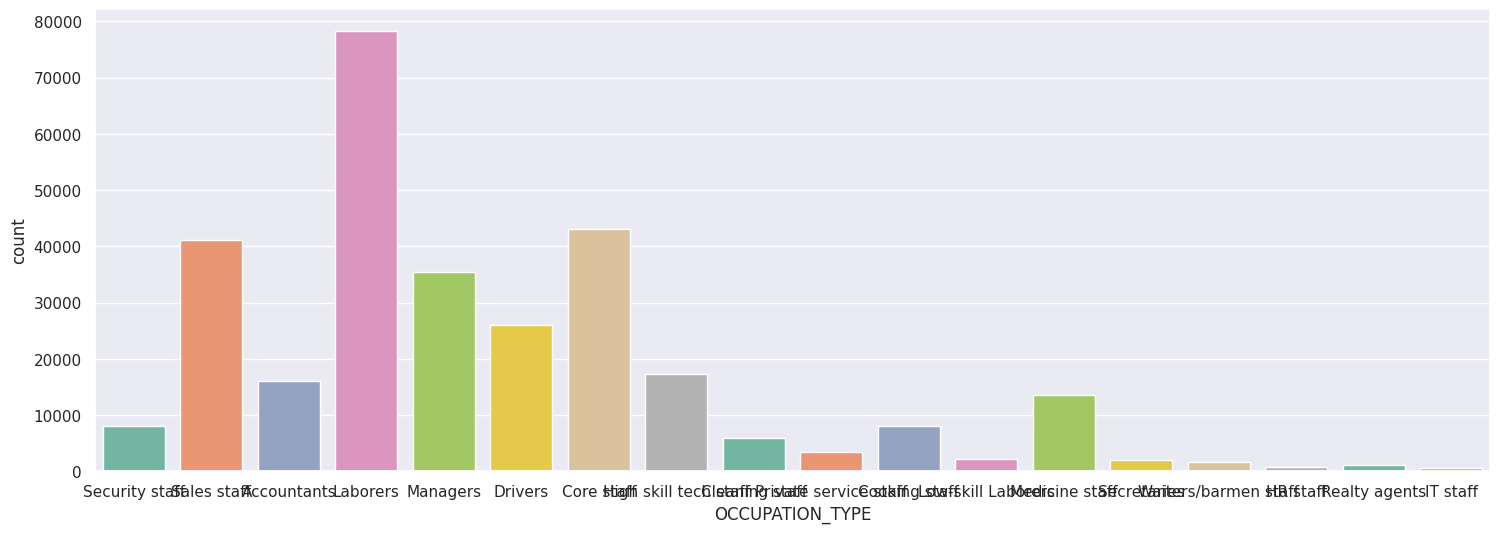

In [ ]:
print("Number of people working status:")

print(app['OCCUPATION_TYPE'].value_counts())

sns.set(rc= {'figure.figsize':(18,6)})

sns.countplot(x='OCCUPATION_TYPE', data=app, palette = 'Set2')

Types of house of the peoples:
NAME_HOUSING_TYPE
House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: count, dtype: int64


<ipython-input-7-3708f1c5818e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette = 'Set2')


<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

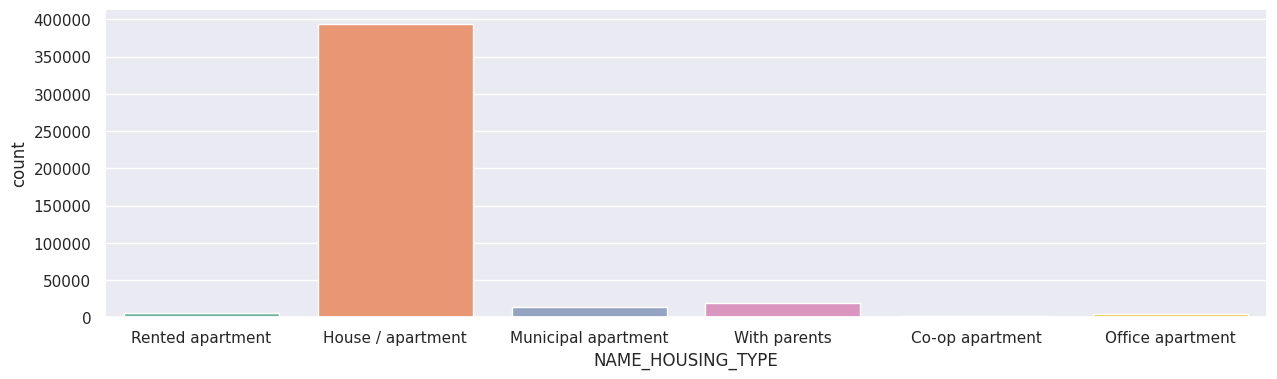

In [ ]:
print("Types of house of the peoples:")
print(app['NAME_HOUSING_TYPE'].value_counts())

sns.set(rc = {'figure.figsize': (15,4)})

sns.countplot(x='NAME_HOUSING_TYPE', data=app, palette = 'Set2')

Income Types Of the Person :
NAME_INCOME_TYPE
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: count, dtype: int64


<ipython-input-8-80b72d6986c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_INCOME_TYPE', data=app, palette='Set2')


<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

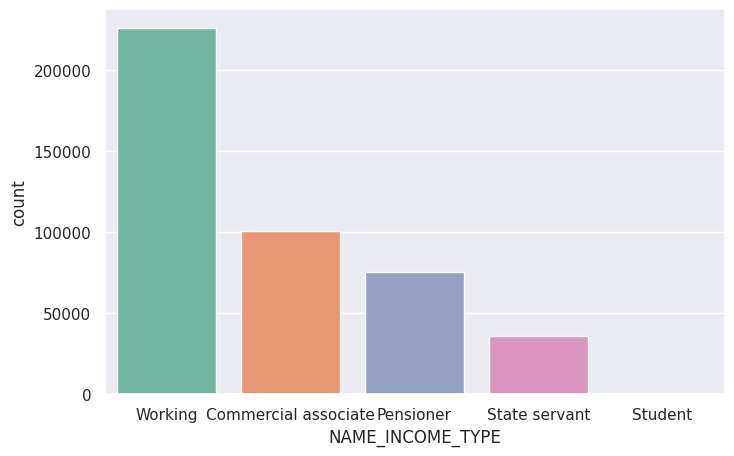

In [ ]:
print("Income Types Of the Person :")

print(app['NAME_INCOME_TYPE'].value_counts())

sns.set(rc = {'figure.figsize': (8,5)})

sns.countplot(x='NAME_INCOME_TYPE', data=app, palette='Set2')

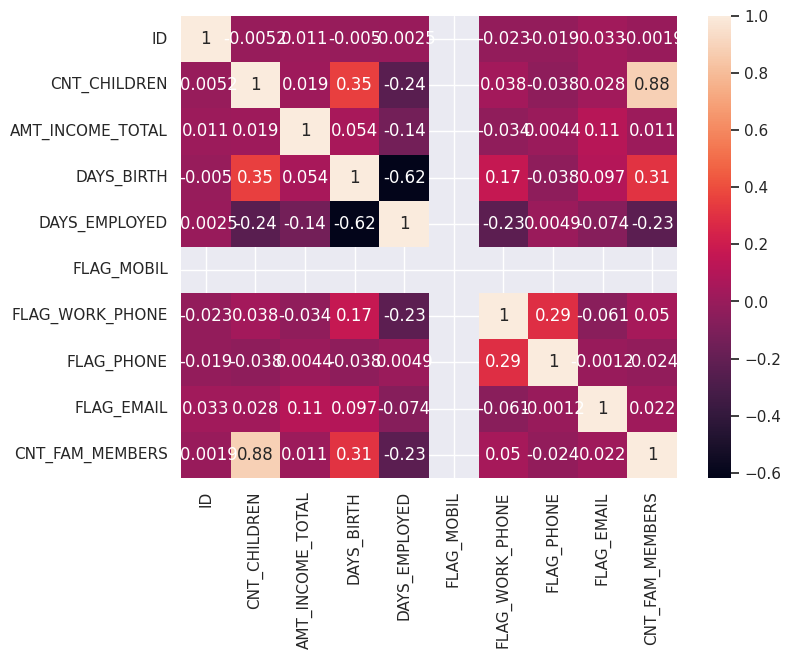

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns before calculating correlation
numerical_app = app.select_dtypes(include=['number'])

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(numerical_app.corr(),annot=True)
plt.show()

In [ ]:
app.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [ ]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
def unique_values():

  a=app.CODE_GENDER.unique()

  print("  CODE_GENDER")
  print(a)
  print()
  b=app.FLAG_OWN_CAR.unique()
  print("FLAG_OWN_CAR")
  print(b)
  print()
  c=app.FLAG_OWN_REALTY.unique()
  print("FLAG_OWN_REALTY")
  print(c)
  print()
  d=app.CNT_CHILDREN.unique()
  print("CNT_CHILDREN")
  print(d)
  print()
  e=app.NAME_INCOME_TYPE.unique()
  print("NAME_INCOME_TYPE")
  print(e)
  print()
  f=app.NAME_EDUCATION_TYPE.unique()
  print("NAME_EDUCATION_TYPE")
  print(f)
  print()
  g=app.NAME_FAMILY_STATUS.unique()
  print("NAME_FAMILY_STATUS")
  print(g)
  print()
  h=app.NAME_HOUSING_TYPE.unique()
  print("NAME_HOUSING_TYPE")
  print(h)
  print()
  i=app.OCCUPATION_TYPE.unique()
  print("OCCUPATION_TYPE")
  print(i)
  print()
  j=app.CNT_FAM_MEMBERS.unique()
  print("CNT_FAM_MEMBERS")
  print(j)
  print()
  return unique_values

In [ ]:
#droping unwandted features
app.drop_duplicates(subset=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
                           'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
                           'FLAG_EMAIL', 'OCCUPATION_TYPE','CNT_FAM_MEMBERS'], keep='first',inplace=True)

In [ ]:
app.isnull().mean()

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.305012
CNT_FAM_MEMBERS        0.000000
dtype: float64

In [ ]:
# Calculate the index of the 'OCCUPATION_TYPE' column
occupation_index = app.columns.get_loc('OCCUPATION_TYPE')

# Select columns from the beginning to 'OCCUPATION_TYPE'
columns_to_consider = app.columns[:occupation_index + 1]

# Drop rows with null values in the selected columns
app.dropna(subset=columns_to_consider, inplace=True)

In [ ]:
app.isnull().mean()

ID                     0.0
CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_BIRTH             0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
dtype: float64

In [ ]:
#data cleaning
def data_cleaning(data):
  # Adding number of family members with number of children to get overall family members.
 data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
 dropped_cols = ['FLAG MOBIL', "FLAG_WORK_PHONE","FLAG_PHONE", "FLAG_EMAIL", 'OCCUPATION_TYPE', 'CNT_CHILDREN']
 data=data.drop(dropped_cols, axis = 1)
 #converting birth years and days employed to years.
 data["DAYS_BIRTH"]=np.abs(data['DAYS_BIRTH']/365) #Absolute
 data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED']/365
 #Cleaning up categorical values to lower the count of dumm                                                                                                     y variables.
 housing_type = { "House / apartment": "House / apartment", "With parents": "With parents", "Municipal apartment": "House / apartment", "Rented apartment": "House / apartment", "Office apartment": "House / apartment", "Co-op apartment": "House / apartment"}
 income_type = {'Commercial associate': "Working",
 "State servant": "Working", 'Working': 'Working', 'Pensioner': 'Pensioner',
 'Student': 'Student'}
 education_type = {'Secondary / secondary special': 'secondary', 'Lower secondary': 'secondary', "Higher education": "Higher education", 'Incomplete higher': 'Higher education', 'Academic degree': 'Academic degree'}
 family_status = {'Single / not married': 'Single', 'Separated': 'Single', 'Widow': 'Single', 'Civil marriage': 'Married', 'Married': 'Married'}
 data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
 data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
 data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
 data["NAME_FAMILY_STATUS"]=data['NAME_FAMILY_STATUS'].map(family_status)
 return data

In [ ]:
credit.shape

(1048575, 3)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
def data_cleansing(data):
 # Adding number of family members with number of children to get overall family members.
 data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'] + data['CNT_CHILDREN']
 dropped_cols = ['FLAG MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_CHILDREN']
 data=data.drop(dropped_cols, axis = 1)
 #converting birth years and days employed to years.
 data['DAYS_BIRTH']=np.abs(data['DAYS_BIRTH']/365) #Absolute
 data['DAYS_EMPLOYED']=data['DAYS_EMPLOYED']/365
 #Cleaning up categorical values to Lower the count of dummy variables.
 housing_type = {'House / apartment': 'House / apartment', 'With parents': 'With parents', 'Municipal apartment': 'House / apartment', 'Rented apartment': "House / apartment", 'Office apartment': "House / apartment", 'Co-op apartment': 'House / apartment'}
 income_type = {'Commercial associate': 'Working',
 'State servant': "Working", 'Working': 'Working',
 'Pensioner': 'Pensioner',
 'Student': 'Student'}
 education_type = {'Secondary / secondary special': 'secondary',' Lower secondary': 'secondary', 'Higher education': "Higher education",
 'Incomplete higher': 'Higher education', 'Academic degree': 'Academic degree'}
 family_status = {'Single / not married': 'Single', 'Widow': 'Single', 'Civil marriage': 'Married',
 'Separated': 'Single',
 'Married': 'Married'}
 data['NAME_HOUSING_TYPE'] = data['NAME_HOUSING_TYPE'].map(housing_type)
 data['NAME_INCOME_TYPE'] = data['NAME_INCOME_TYPE'].map(income_type)
 data['NAME_EDUCATION_TYPE']=data['NAME_EDUCATION_TYPE'].map(education_type)
 data['NAME FAMILY_STATUS']=data['NAME_FAMILY_STATUS'].map(family_status)
 return data

In [ ]:
#Data frame to analyze Length of time since initial approval of credit card
#Shows number of past dues, paid off and no Loan status.
grouped=credit.groupby('ID')
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE' , values = 'STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped ['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month']-pivot_tb["open_month"]
pivot_tb['window'] += 1#Adding 1 since month starts at 9.
#Counting number of past dues, pata offs and no Loans.
pivot_tb['paid_off'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'C'].count(axis = 1)
pivot_tb['pastdue_1-29'] = pivot_tb[pivot_tb.iloc[:,0:61] == '0'].count(axis = 1)
pivot_tb['pastdue_30-59'] = pivot_tb[pivot_tb.iloc[:,0:61] == '1'].count(axis = 1)
pivot_tb['pastdue_60-89'] = pivot_tb[pivot_tb.iloc[:,0:61] == '2'].count(axis = 1)
pivot_tb['pastdue_90-119'] = pivot_tb[pivot_tb.iloc[:,0:61] == '3'].count(axis = 1)
pivot_tb['pastdue_120-149'] = pivot_tb[pivot_tb.iloc[:,0:61] == '4'].count(axis = 1)
pivot_tb['pastdue_over_150'] = pivot_tb[pivot_tb.iloc[:,0:61] == '5'].count(axis = 1)
pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:,0:61] == 'X'].count(axis = 1)
#Setting Id column to merge with app date.
pivot_tb['ID'] = pivot_tb.index

In [ ]:
pivot_tb.head(10)

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,window,paid_off,pastdue_1-29,pastdue_30-59,pastdue_60-89,pastdue_90-119,pastdue_120-149,pastdue_over_150,no_loan,ID
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,0,3,0,0,0,0,0,1,5001711
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19,9,10,0,0,0,0,0,0,5001712
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,0,0,0,0,0,0,0,22,5001713
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15,0,0,0,0,0,0,0,15,5001714
5001715,NaN,X,X,X,X,X,X,X,X,X,...,60,0,0,0,0,0,0,0,60,5001715
5001717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22,5,17,0,0,0,0,0,0,5001717
5001718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39,3,24,2,0,0,0,0,10,5001718
5001719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,41,2,0,0,0,0,0,0,5001719
5001720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36,0,29,7,0,0,0,0,0,5001720


In [ ]:
#feature engineering
def feature_engineering_target(data):
   good_or_bad =[]
   for index, row in data.iterrows():
    paid_off = row['paid_off']
    over_1= row['pastdue_1-29']
    over_30=row['pastdue_30-59']
    over_60=row['pastdue_60-89']
    over_90=row['pastdue_90-119']
    over_120=row['pastdue_120-149'] + row['pastdue_over_150']
    no_loan=row['no_loan']
    overall_pastdues=over_1+over_30+over_60+over_90+over_120
    if overall_pastdues == 0:
      if paid_off > no_loan or paid_off <= no_loan: good_or_bad.append(1)
      elif paid_off and no_loan == 1: good_or_bad.append(1)
    elif overall_pastdues != 0:
       if paid_off > overall_pastdues: good_or_bad.append(1)
       elif paid_off <= overall_pastdues:
          good_or_bad.append(0)
    elif paid_off == 0 and no_loan != 0:
       if overall_pastdues <= no_loan or overall_pastdues >= no_loan: good_or_bad.append(0)
    else:
      good_or_bad.append(1)
   return good_or_bad

In [ ]:
#merging
import pandas as pd
cleansed_app = pd.read_csv("/content/application_record.csv (3).zip")
target = pd.DataFrame()
target['ID'] = pivot_tb.index
target['paid_off'] = pivot_tb['paid_off'].values
target['#_of_pastdues'] = pivot_tb['pastdue_1-29'].values+ pivot_tb['pastdue_30-59'].values
+ pivot_tb['pastdue_60-89'].values +pivot_tb['pastdue_90-119'].values
+pivot_tb['pastdue_120-149'].values +pivot_tb['pastdue_over_150'].values
target['no_loan'] = pivot_tb['no_loan'].values
target['target'] = feature_engineering_target(pivot_tb)
credit_app=cleansed_app.merge(target, how ='inner', on='ID')
credit_app.drop('ID', axis = 1, inplace = True)


In [ ]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,1,0,0,NaN,2.0,13,2,1,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,1,0,0,NaN,2.0,12,2,1,1
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,Security staff,2.0,7,7,16,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,0,1,1,Sales staff,1.0,0,2,3,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,0,1,1,Sales staff,1.0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,...,1,0,0,0,Managers,2.0,0,0,8,0
36453,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,...,1,0,1,1,Medicine staff,2.0,5,8,0,0
36454,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,1,0,1,1,Medicine staff,2.0,14,8,0,0
36455,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,...,1,0,0,0,Sales staff,2.0,0,9,0,0


In [ ]:
credit_app.NAME_INCOME_TYPE.value_counts()

NAME_INCOME_TYPE
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: count, dtype: int64

In [ ]:
credit_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36457 non-null  object 
 1   FLAG_OWN_CAR         36457 non-null  object 
 2   FLAG_OWN_REALTY      36457 non-null  object 
 3   CNT_CHILDREN         36457 non-null  int64  
 4   AMT_INCOME_TOTAL     36457 non-null  float64
 5   NAME_INCOME_TYPE     36457 non-null  object 
 6   NAME_EDUCATION_TYPE  36457 non-null  object 
 7   NAME_FAMILY_STATUS   36457 non-null  object 
 8   NAME_HOUSING_TYPE    36457 non-null  object 
 9   DAYS_BIRTH           36457 non-null  int64  
 10  DAYS_EMPLOYED        36457 non-null  int64  
 11  FLAG_MOBIL           36457 non-null  int64  
 12  FLAG_WORK_PHONE      36457 non-null  int64  
 13  FLAG_PHONE           36457 non-null  int64  
 14  FLAG_EMAIL           36457 non-null  int64  
 15  OCCUPATION_TYPE      25134 non-null 

In [ ]:
credit_app.isnull().mean()

CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.310585
CNT_FAM_MEMBERS        0.000000
paid_off               0.000000
#_of_pastdues          0.000000
no_loan                0.000000
target                 0.000000
dtype: float64

In [ ]:
# Calculate the index of the 'OCCUPATION_TYPE' column
occupation_index = credit_app.columns.get_loc('OCCUPATION_TYPE')

# Select columns from the beginning to 'OCCUPATION_TYPE'
columns_to_consider = credit_app.columns[:occupation_index + 1]

# Drop rows with null values in the selected columns
credit_app.dropna(subset=columns_to_consider, inplace=True)

In [ ]:
credit_app.isnull().mean()

CODE_GENDER            0.0
FLAG_OWN_CAR           0.0
FLAG_OWN_REALTY        0.0
CNT_CHILDREN           0.0
AMT_INCOME_TOTAL       0.0
NAME_INCOME_TYPE       0.0
NAME_EDUCATION_TYPE    0.0
NAME_FAMILY_STATUS     0.0
NAME_HOUSING_TYPE      0.0
DAYS_BIRTH             0.0
DAYS_EMPLOYED          0.0
FLAG_MOBIL             0.0
FLAG_WORK_PHONE        0.0
FLAG_PHONE             0.0
FLAG_EMAIL             0.0
OCCUPATION_TYPE        0.0
CNT_FAM_MEMBERS        0.0
paid_off               0.0
#_of_pastdues          0.0
no_loan                0.0
target                 0.0
dtype: float64

In [ ]:
credit_app['CNT_FAM_MEMBERS']=credit_app['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
credit_app['DAYS_BIRTH'] = credit_app['DAYS_BIRTH'].abs()
credit_app['DAYS_EMPLOYED'] = credit_app['DAYS_EMPLOYED'].abs()

In [ ]:
credit_app=credit_app.drop(['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_CHILDREN'],axis=1) # Removed space from 'FLAG MOBIL'

In [ ]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,#_of_pastdues,no_loan,target
2,M,Y,Y,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,2,7,7,16,0
3,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,2,3,0
4,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,0,5,1
5,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,15,6,6,1
6,F,N,Y,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,27,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,315000.0,Working,Secondary / secondary special,Married,House / apartment,17348,2420,2,0,0,8,0
36453,F,N,Y,157500.0,Commercial associate,Higher education,Married,House / apartment,12387,1325,2,5,8,0,0
36454,F,N,Y,157500.0,Pensioner,Higher education,Married,House / apartment,12387,1325,2,14,8,0,0
36455,F,N,Y,283500.0,Working,Secondary / secondary special,Married,House / apartment,17958,655,2,0,9,0,0


In [ ]:
# Assuming 'credit_app' is your DataFrame
credit_app['AMT_INCOME_TOTAL'] = credit_app['AMT_INCOME_TOTAL'].astype(int)

In [ ]:
credit_app = credit_app.rename(columns={'#_of_pastdues': 'no_of_pastdues'})

In [ ]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,no_of_pastdues,no_loan,target
2,M,Y,Y,112500,Working,Secondary / secondary special,Married,House / apartment,21474,1134,2,7,7,16,0
3,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,2,3,0
4,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,0,0,5,1
5,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,15,6,6,1
6,F,N,Y,270000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,1,27,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,M,Y,Y,315000,Working,Secondary / secondary special,Married,House / apartment,17348,2420,2,0,0,8,0
36453,F,N,Y,157500,Commercial associate,Higher education,Married,House / apartment,12387,1325,2,5,8,0,0
36454,F,N,Y,157500,Pensioner,Higher education,Married,House / apartment,12387,1325,2,14,8,0,0
36455,F,N,Y,283500,Working,Secondary / secondary special,Married,House / apartment,17958,655,2,0,9,0,0


In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
cg = LabelEncoder()
oc = LabelEncoder()
own_r = LabelEncoder()
it=LabelEncoder()
et=LabelEncoder()
fs = LabelEncoder()
ht= LabelEncoder()
credit_app['CODE_GENDER'] = cg.fit_transform(credit_app['CODE_GENDER'])
credit_app['FLAG_OWN_CAR'] = oc.fit_transform(credit_app['FLAG_OWN_CAR'])
credit_app['FLAG_OWN_REALTY'] = own_r.fit_transform(credit_app['FLAG_OWN_REALTY'])
credit_app['NAME_INCOME_TYPE'] = it.fit_transform(credit_app['NAME_INCOME_TYPE'])
credit_app['NAME_EDUCATION_TYPE'] = et.fit_transform(credit_app['NAME_EDUCATION_TYPE'])
credit_app['NAME_FAMILY_STATUS'] = fs.fit_transform(credit_app['NAME_FAMILY_STATUS'])
credit_app['NAME_HOUSING_TYPE'] = ht.fit_transform(credit_app['NAME_HOUSING_TYPE'])

In [ ]:
print("CODE_GENDER", credit_app['CODE_GENDER'].unique())
print(cg.inverse_transform(list (credit_app['CODE_GENDER'].unique())))
print()
print("FLAG_OWN_CAR:", credit_app['FLAG_OWN_CAR'].unique())
print(oc.inverse_transform(list (credit_app['FLAG_OWN_CAR'].unique())))
print()
print("FLAG_OWN_REALTY", credit_app['FLAG_OWN_REALTY'].unique())
print(own_r.inverse_transform(list(credit_app['FLAG_OWN_REALTY'].unique())))
print()
print("NAME_INCOME_TYPE", credit_app['NAME_INCOME_TYPE'].unique())
print(it.inverse_transform(list (credit_app['NAME_INCOME_TYPE'].unique())))
print()
print("NAME_EDUCATION_TYPE", credit_app['NAME_EDUCATION_TYPE'].unique())
print(et.inverse_transform(list(credit_app['NAME_EDUCATION_TYPE'].unique())))
print()
print("NAME_FAMILY_STATUS", credit_app['NAME_FAMILY_STATUS'].unique())
print(fs.inverse_transform(list (credit_app['NAME_FAMILY_STATUS'].unique())))
print()
print("NAME_HOUSING_TYPE", credit_app['NAME_HOUSING_TYPE'].unique())
print(ht.inverse_transform(list(credit_app['NAME_HOUSING_TYPE'].unique())))

CODE_GENDER [1 0]
['M' 'F']

FLAG_OWN_CAR: [1 0]
['Y' 'N']

FLAG_OWN_REALTY [1 0]
['Y' 'N']

NAME_INCOME_TYPE [4 0 2 3 1]
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

NAME_EDUCATION_TYPE [4 1 2 3 0]
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS [1 3 0 2 4]
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

NAME_HOUSING_TYPE [1 4 2 5 0 3]
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


In [ ]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,no_of_pastdues,no_loan,target
2,1,1,1,112500,4,4,1,1,21474,1134,2,7,7,16,0
3,0,0,1,270000,0,4,3,1,19110,3051,1,0,2,3,0
4,0,0,1,270000,0,4,3,1,19110,3051,1,0,0,5,1
5,0,0,1,270000,0,4,3,1,19110,3051,1,15,6,6,1
6,0,0,1,270000,0,4,3,1,19110,3051,1,27,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,315000,4,4,1,1,17348,2420,2,0,0,8,0
36453,0,0,1,157500,0,1,1,1,12387,1325,2,5,8,0,0
36454,0,0,1,157500,1,1,1,1,12387,1325,2,14,8,0,0
36455,0,0,1,283500,4,4,1,1,17958,655,2,0,9,0,0


In [ ]:
credit_app

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,no_of_pastdues,no_loan,target
2,1,1,1,112500,4,4,1,1,21474,1134,2,7,7,16,0
3,0,0,1,270000,0,4,3,1,19110,3051,1,0,2,3,0
4,0,0,1,270000,0,4,3,1,19110,3051,1,0,0,5,1
5,0,0,1,270000,0,4,3,1,19110,3051,1,15,6,6,1
6,0,0,1,270000,0,4,3,1,19110,3051,1,27,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,315000,4,4,1,1,17348,2420,2,0,0,8,0
36453,0,0,1,157500,0,1,1,1,12387,1325,2,5,8,0,0
36454,0,0,1,157500,1,1,1,1,12387,1325,2,14,8,0,0
36455,0,0,1,283500,4,4,1,1,17958,655,2,0,9,0,0


In [ ]:
x = credit_app[credit_app.drop('target',axis=1).columns]
y = credit_app['target']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, random_state = 0)

In [ ]:
#LOGISTIC REGRESSION
def logistic_reg(xtrain,xtest, ytrain, ytest):
 lr=LogisticRegression(solver="liblinear")
 lr.fit(xtrain, ytrain)
 ypred=lr.predict(xtest)
 print("*****LogisticRegression****")
 print("Confusion matrix")
 print(confusion_matrix(ytest,ypred))
 print("Classification report")
 print(classification_report(ytest, ypred))

In [ ]:
#RANDOM FOREST
def random_forest (xtrain,xtest, ytrain, ytest):
 rf=RandomForestClassifier()
 rf.fit(xtrain, ytrain)
 ypred=rf.predict(xtest)
 print("******Random ForestClassifler****")
 print("Confusion matrix")
 print(confusion_matrix(ytest,ypred))
 print("Classification report")
 print(classification_report(ytest,ypred))

In [ ]:
#GRADIENT BOOSTING
def g_boosting(xtrain, xtest, ytrain, ytest):
 gb=GradientBoostingClassifier()
 gb.fit(xtrain, ytrain)
 ypred=gb.predict(xtest)
 print("****GradientBoostingClassifier****")
 print("Confusion matrix")
 print(confusion_matrix(ytest, ypred))
 print("Classification report")
 print(classification_report(ytest,ypred))

In [ ]:
lr_classifier = LogisticRegressionclassifier()
#define hyperparameters and their possible values for tuning
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300],
    'fit_intercept': [True, False]
}


In [ ]:
#DECISION TREE
def d_tree (xtrain, xtest, ytrain, ytest):
 dt=DecisionTreeClassifier()
 dt.fit(xtrain, ytrain)
 ypred=dt.predict(xtest)
 print("***DecisionTreeClassifier****")
 print('Confusion matrix')
 print(confusion_matrix(ytest,ypred))
 print("Classification report")
 print(classification_report (ytest, ypred))

In [ ]:
def compare_model(xtrain,xtest,ytrain,ytest):
  logistic_reg(xtrain,xtest,ytrain,ytest)
  print('_'*100)
  random_forest(xtrain,xtest,ytrain,ytest)
  print('_'*100)
  g_boosting(xtrain,xtest,ytrain,ytest)
  print('_'*100)
  d_tree(xtrain,xtest,ytrain,ytest)

In [ ]:
compare_model(xtrain,xtest,ytrain,ytest)

*****LogisticRegression****
Confusion matrix
[[2617   75]
 [ 199 2136]]
Classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2692
           1       0.97      0.91      0.94      2335

    accuracy                           0.95      5027
   macro avg       0.95      0.94      0.94      5027
weighted avg       0.95      0.95      0.95      5027

____________________________________________________________________________________________________
******Random ForestClassifler****
Confusion matrix
[[2677   15]
 [  18 2317]]
Classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2692
           1       0.99      0.99      0.99      2335

    accuracy                           0.99      5027
   macro avg       0.99      0.99      0.99      5027
weighted avg       0.99      0.99      0.99      5027

___________________________________________________

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain, ytrain)
ypred=lr.predict(xtest)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pickle
pickle.dump(lr,open("creditcardmodel10.pkl","wb"))

In [ ]:
x

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,paid_off,no_of_pastdues,no_loan
2,1,1,1,112500,4,4,1,1,21474,1134,2,7,7,16
3,0,0,1,270000,0,4,3,1,19110,3051,1,0,2,3
4,0,0,1,270000,0,4,3,1,19110,3051,1,0,0,5
5,0,0,1,270000,0,4,3,1,19110,3051,1,15,6,6
6,0,0,1,270000,0,4,3,1,19110,3051,1,27,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,315000,4,4,1,1,17348,2420,2,0,0,8
36453,0,0,1,157500,0,1,1,1,12387,1325,2,5,8,0
36454,0,0,1,157500,1,1,1,1,12387,1325,2,14,8,0
36455,0,0,1,283500,4,4,1,1,17958,655,2,0,9,0


In [ ]:
import pickle # import the pickle library

# Load the saved model
model = pickle.load(open("creditcardmodel18.pkl","rb"))

# Define xpred as an array
xpred = [[1,1,1,112500,4,4,1,1,21474,1134,2,7,7,16]]

# Make a prediction using the loaded model
model.predict(xpred)

FileNotFoundError: [Errno 2] No such file or directory: 'creditcardmodel18.pkl'